In [16]:
import numpy as np
import sklearn as sk
import sklearn.preprocessing as pr
import sklearn.manifold as mani
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

import MyLib
from MyLib import Data

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


%matplotlib inline


# Reading files, creating Data object and scaling 

In [17]:
x_train = pd.read_csv('x_train.csv',sep=';')
y_train = pd.read_csv('y_train.csv',sep=';',names=['value'])

data = Data(x_train,y_train)
data.scale()

print data.shape
data.describe()

((25289, 12), (25289,))


,0,1,2,3,4,5,6,7,8,9,10,11
count,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04
mean,-9.496755e-17,1.362700e-17,2.577891e-17,-1.770105e-17,7.677480e-17,2.047562e-17,1.798202e-17,-7.192809e-17,-6.876719e-17,-7.136615e-17,-2.683255e-17,-9.328174e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-9.133637e-01,-8.787185e-01,-3.705914e-01,-6.461602e-01,-2.002443e+00,-4.240925e-01,-7.392115e-01,-1.330177e+00,-8.445122e-01,-9.853780e-01,-9.143458e-01,-6.238244e-01
25%,-7.150745e-01,-7.247733e-01,-3.705914e-01,-5.711457e-01,-7.406313e-01,-4.240925e-01,-7.392115e-01,-1.330177e+00,-7.030901e-01,-7.203942e-01,-7.102849e-01,-6.238244e-01
50%,-3.680686e-01,-3.399103e-01,-3.705914e-01,-3.711068e-01,1.840300e-01,-4.240925e-01,-4.375677e-01,2.094257e-01,-3.467531e-01,-2.941160e-01,-3.021630e-01,-6.238244e-01
75%,4.250878e-01,2.758705e-01,-7.501825e-02,1.039853e-01,6.593793e-01,-4.240925e-01,1.657198e-01,1.156873e+00,2.944777e-01,3.395409e-01,3.440299e-01,9.942581e-02
max,6.324189e+00,9.974418e+00,2.696993e+01,1.340657e+01,4.006186e+00,2.357976e+00,1.147736e+01,1.156873e+00,8.331237e+00,1.020155e+01,9.934893e+00,4.077302e+00


In [18]:
#Universal testing function
def test_alg(algo,X=data.X,y=data.y,test_size = 0.2,desc = True):  
        # X=X will use your global X defined above. 
        
    x_train_, x_test_, y_train_, y_test_ = sk.model_selection.train_test_split(X,y,test_size=test_size)
    #fitting the model
    algo.fit(x_train_,y_train_)
    y_pred = algo.predict_proba(x_test_)
    #return log loss
    metrics = sk.metrics.log_loss(y_test_,y_pred)
    s= "result: "+str(metrics)
    if desc:
        s = s+" \n\nAlgorithm info:\n"+str(algo)
    print s
    return algo

def scor_logloss(estimator,X,y):
    pr = estimator.predict_proba(X)
    return sk.metrics.log_loss(y,pr)

def test_alg_cv(algo,X=data.X,y=data.y,test_size = 0.2,desc = False,cv=5):  
    # X=X will use your global X defined above. 
    #return log loss
    cv_score = sk.model_selection.cross_val_score(algo,X,y,scoring=scor_logloss,cv=cv)
    s= "result: "+str(cv_score.mean())+" std:"+str(np.std(cv_score))
    if desc:
        s = s+" \n\nAlgorithm info:\n"+str(algo)
    print s
    return algo,cv_score,cv_score.mean()

In [5]:

Forest = RandomForestClassifier(n_estimators=100,max_depth=4,criterion='entropy')

droped = Data(np.delete(data.X,[0,1,3,4,5,6,7,8,9,10,11],1),data.y)
droped.shuffle()
print droped.shape,data.shape
#a = data.X[:,0].reshape(25289,1)
test_alg(Forest,X=droped.X,y=droped.y)

((25289, 1), (25289,)) ((25289, 12), (25289,))
result: 0.515983142807 

Algorithm info:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

result: 0.398186816033 

Algorithm info:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
result: 0.517529187421 

Algorithm info:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
((25289, 1), (25289,))


IndexError: index 1 is out of bounds for axis 1 with size 1

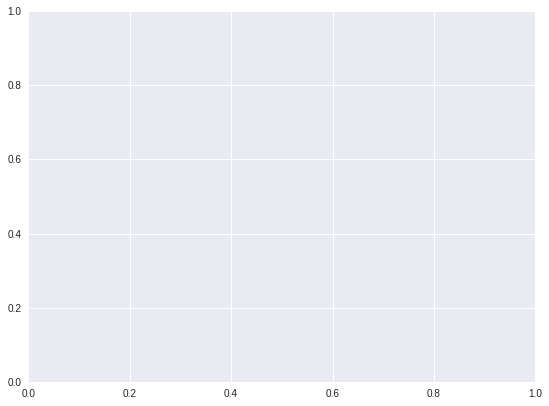

In [6]:
plt.figure(figsize=(20,15))
fich_number1 =3
fich_number2 = 6

f = test_alg(Forest)
p = f.predict_proba(data.X)[:,1]
data_p=Data(data.X,p)

d = test_alg(Forest,X=droped.X,y=droped.y)
p_d = d.predict_proba(droped.X)[:,1]
droped_p=Data(droped.X,p_d)

print droped_p.shape
plt.subplot(221)
droped_p.plot_scatter(0,1,alpha=0.1)
plt.subplot(222)
data_p.plot_scatter(fich_number1,fich_number2,alpha=0.1)
plt.subplot(223)
data.plot_scatter(fich_number1,fich_number2,alpha=0.1)

In [7]:
droped.X.shape
#data.plot_hist(0)

(25289, 1)

#### estimating feature benefit by training forest without it

In [477]:
Forest = RandomForestClassifier(n_estimators=100,max_depth=4,criterion='entropy')
for i in range(12):
    #a = np.delete(range(12),i)
    x = data.X[:,i].reshape(25289,1)
    print x.shape,data.y.shape
    
    test_alg_cv(Forest,X = x,y=data.y,desc=False)
    print "without",i,data.keys[i]

(25289, 1) (25289,)
result: 0.4236858656430.00607342539705
without 0 maxPlayerLevel
(25289, 1) (25289,)
result: 0.4740497462970.00606105715747
without 1 numberOfAttemptedLevels
(25289, 1) (25289,)
result: 0.5147399546440.00354814970593
without 2 attemptsOnTheHighestLevel
(25289, 1) (25289,)
result: 0.4118131400090.00708371041247
without 3 totalNumOfAttempts
(25289, 1) (25289,)
result: 0.4425874273030.00583012358698
without 4 averageNumOfTurnsPerCompletedLevel
(25289, 1) (25289,)
result: 0.5789901070060.00275894236773
without 5 doReturnOnLowerLevels
(25289, 1) (25289,)
result: 0.4553699795120.00768935327116
without 6 numberOfBoostersUsed
(25289, 1) (25289,)
result: 0.4956178708870.00730645496357
without 7 fractionOfUsefullBoosters
(25289, 1) (25289,)
result: 0.4839525936850.00476678777355
without 8 totalScore
(25289, 1) (25289,)
result: 0.4911068166380.00371947098691
without 9 totalBonusScore
(25289, 1) (25289,)
result: 0.4868619743540.00493743604681
without 10 totalStarsCount
(25289, 1

In [8]:
test_alg_cv(Forest,desc =False)

result: 0.388791055481 std:0.00818863058491


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=4, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 array([ 0.39467498,  0.3839884 ,  0.38249382,  0.40198969,  0.38080838]),
 0.38879105548059539)

#### Taiga is mand made stacking of forests

In [9]:
def print_r(s):
    sys.stdout.write('\r')
    sys.stdout.flush()
    sys.stdout.write(s)
import copy 
import sys
class Taiga:
    def __init__(self,Forest):
        self.clf = Forest
        self.meta_clf = Forest
        
    def fit(self,X,y):
        print "fitting model"
        print '.'
        meta_features = []
        self.forests = []
        main = self.clf
        self.meta_num_f =12
        for i in range(self.meta_num_f):
                f = copy.deepcopy(main)
                x = X[:,[i]]
                
                x = np.concatenate([x,np.log(1+np.abs(x))],axis=1)
                x=x.reshape(len(x),2)
                f.fit(x,y)
                self.forests.append(f)
                
                preds = np.asarray(f.predict_proba(x)[:,1])
                meta_features.append(preds)
                
                print sk.metrics.log_loss(y,y_pred=preds), "mean=",x.mean()
                print_r(str(i))
                
                print preds,preds.shape
                
        meta_features = np.asarray(meta_features).reshape(len(y),self.meta_num_f)
        print meta_features.shape, X.shape
        meta_features = np.concatenate([meta_features],axis = 1)
        self.meta_f = meta_features
        meta = self.meta_clf
        meta.fit(meta_features,y)
        self.meta_clf = meta;
        
    def predict_proba(self,X):
        i=0
        preds = []
        for f in self.forests:
            x= X[:,[i]]
            x = np.concatenate([x,np.log(1+np.abs(x))],axis=1)
            x=x.reshape((x).shape[0],2)
            pr = f.predict_proba(x)[:,1]
            preds.append(pr)
            print_r(str(i))
            i=i+1
        preds = np.asarray(preds).reshape(x.shape[0],self.meta_num_f)
        preds = np.zeros(preds.shape)
        preds = np.concatenate([preds],axis =1)
        return self.meta_clf.predict_proba(preds)

In [454]:
taiga  = Taiga(Forest)
taiga.meta_clf = RandomForestClassifier(n_estimators=40,max_depth=4)
#test_alg(taiga)

In [455]:
taiga.fit(data.X,data.y)

fitting model
.
0.419766983817 mean= 0.259946738998
0[ 0.66603398  0.46646738  0.06975133 ...,  0.08122547  0.6387711   0.0209627 ] (25289,)
0.471304882814 mean= 0.243879164014
1[ 0.21190114  0.50763912  0.12538844 ...,  0.14992934  0.07221016
  0.07338424] (25289,)
0.513074165602 mean= 0.169755090851
2[ 0.39617811  0.71901425  0.14519157 ...,  0.32229692  0.14519157
  0.14519157] (25289,)
0.405884754333 mean= 0.220307796735
3[ 0.17746104  0.62909178  0.09021165 ...,  0.12034594  0.03691172
  0.03732242] (25289,)
0.375549707571 mean= 0.27824535304
4[ 0.57392857  1.          0.10065724 ...,  0.09478478  0.47316455
  0.0088979 ] (25289,)
0.578945673848 mean= 0.242148243534
5[ 0.52347339  0.52347339  0.24747166 ...,  0.24747166  0.52347339
  0.24747166] (25289,)
0.454052727764 mean= 0.238320795698
6[ 0.34697502  0.41547878  0.12514724 ...,  0.17238885  0.12514724
  0.05073685] (25289,)
0.473658260336 mean= 0.301126909461
7[ 0.60946254  0.48793769  0.16002261 ...,  0.35631431  0.16002261
 

In [456]:
print taiga.meta_f.shape
data_meta=Data(taiga.meta_f,data.y)

(25289, 12)


In [457]:
r = taiga.predict_proba(data.X)
sk.metrics.log_loss(data.y,r)

11

0.61141288124927262

In [29]:
df = data.df_X
def gen_new_features(df):
    x_train = df
    df['bonus_in_overall']=  x_train['totalBonusScore']/(1+x_train['totalScore'])
    df['score_per_day'] = x_train['totalScore']/x_train['numberOfDaysActuallyPlayed']
    df['star_in_bonus'] = x_train['totalStarsCount']/(1 + x_train['totalBonusScore'])
    df['top_to_all'] =x_train['attemptsOnTheHighestLevel']/x_train['totalNumOfAttempts']
    df['avg_attemps'] =x_train['numberOfAttemptedLevels']/x_train['totalNumOfAttempts']
    return df
def gen_log_features_fordata(data_side):
    data_log = data_side.log_x()
    X  = np.concatenate((data_log.X,data_side.X),axis = 1)
    return Data(X,data.y)
def get_brute_features(data):
    DF  = pd.read_csv('new_features.csv',header=None)
    return Data(DF,data.y)

brut_data = get_brute_features(data)

data_side = Data(gen_new_features(df),data.y)
print data_side.describe()
data_side.scale()

       maxPlayerLevel  numberOfAttemptedLevels  attemptsOnTheHighestLevel  \
count    25289.000000             25289.000000               25289.000000   
mean        18.424888                12.415991                   3.507612   
std         20.172964                12.991894                   6.766648   
min          0.000000                 1.000000                   1.000000   
25%          4.000000                 3.000000                   1.000000   
50%         11.000000                 8.000000                   1.000000   
75%         27.000000                16.000000                   3.000000   
max        146.000000               142.000000                 186.000000   

       totalNumOfAttempts  averageNumOfTurnsPerCompletedLevel  \
count        25289.000000                        25289.000000   
mean            26.841393                           13.330451   
std             39.993029                            6.657224   
min              1.000000                     

array([[ 1.01995513, -0.18596511, -0.07501825, ..., -0.03276268,
        -0.37633043, -0.49381219],
       [ 0.12765415,  0.73770604,  2.2895672 , ..., -0.04117901,
         0.18011458, -1.17432423],
       [-0.66550227, -0.49385549, -0.37059143, ..., -0.04626124,
        -0.40861363,  0.99480788],
       ..., 
       [-0.61593   , -0.4168829 , -0.22280484, ..., -0.04859399,
        -0.22567549,  0.19142562],
       [ 1.81311155, -0.87871847, -0.37059143, ...,  4.25752167,
         2.33545853,  0.99480788],
       [-0.86379138, -0.80174588, -0.37059143, ..., -0.07316569,
         0.68901523,  0.99480788]])

plot for 2
plot for 3
plot for 4
plot for 5


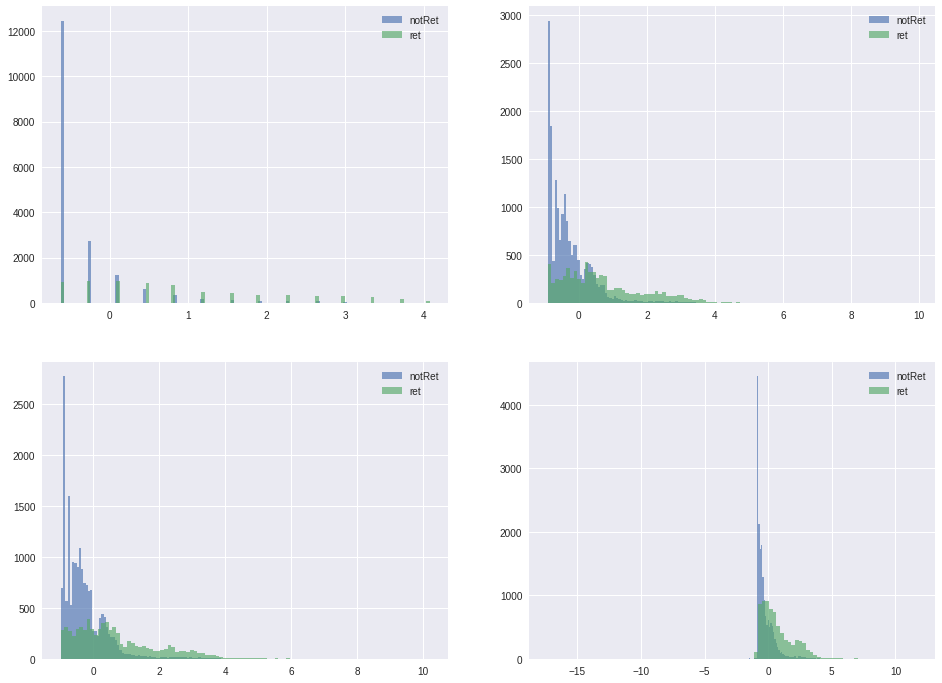

In [32]:
plt.figure(figsize=(16,12))
plt.subplot(221)
brut_data.plot_hist(2,bins=100)
plt.subplot(222)
brut_data.plot_hist(3,bins=100)
plt.subplot(223)
brut_data.plot_hist(4,bins=100)
plt.subplot(224)
brut_data.plot_hist(5,bins=100)

plot for bonus_in_overall
plot for score_per_day
plot for star_in_bonus
plot for top_to_all


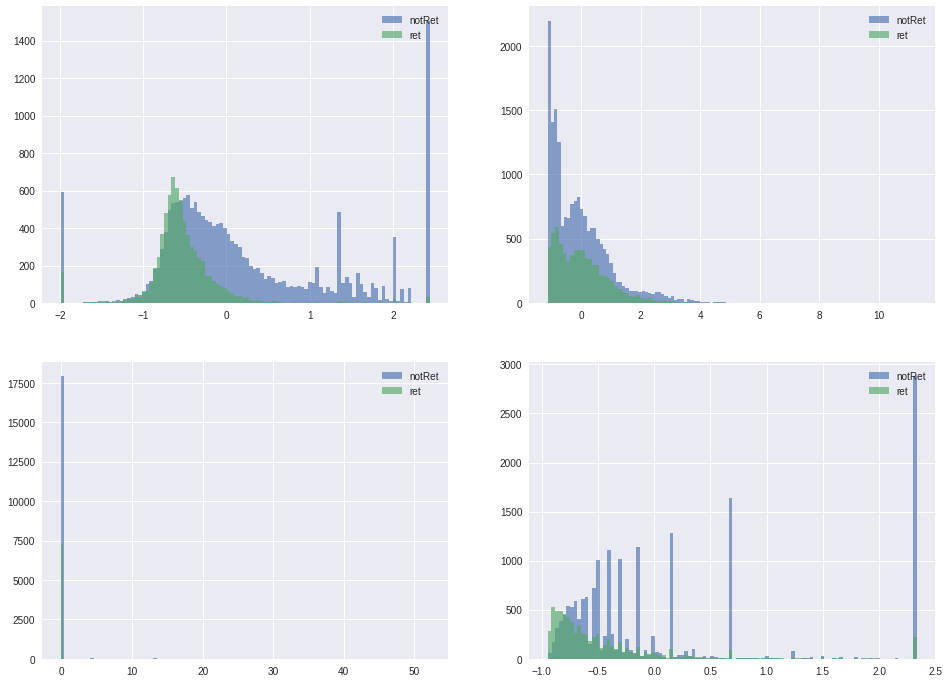

In [22]:
plt.figure(figsize=(16,12))
plt.subplot(221)
data_side.plot_hist(12,bins=100)
plt.subplot(222)
data_side.plot_hist(13,bins=100)
plt.subplot(223)
data_side.plot_hist(14,bins=100)
plt.subplot(224)
data_side.plot_hist(15,bins=100)

In [11]:
MLP = MLPClassifier(hidden_layer_sizes=(15,1))
Forest = RandomForestClassifier(n_estimators=50,max_depth=3)

a = np.delete(range(12),[1,8,10])
b = np.delete(range(17),[1,8,10])

cv=4
print "MLP with new without 1,8,10:"
_,_,s1 =test_alg_cv(MLP,X=data_side.X[:,b])
print "\nMLP without 1,8,10:"
_,_,s1 =test_alg_cv(MLP,X=data.X[:,a])
print "MLP with side:"
_,_,s1 =test_alg_cv(MLP,X=data_side.X,cv=cv)
print "MLP with full"
_,_,s2 =test_alg_cv(MLP,cv=cv)
print "delta:",s1-s2

print "----"

print "Forest with new without 1,8,10:"
_,_,s1 =test_alg_cv(MLP,X=data_side.X[:,b])
print "\nForest without 1,8,10:"
_,_,s1=test_alg_cv(Forest,X = data.X[:,a])
print "Forest with_side:"
_,_,s1=test_alg_cv(Forest,X = data_side.X,cv=cv)
print "Forest with full"
_,_,s2=test_alg_cv(Forest,cv=cv)
print "delta:",s1-s2

MLP with new without 1,8,10:
result: 0.384766021948 std:0.00878871563407

MLP without 1,8,10:
result: 0.38503743952 std:0.00888017894453
MLP with side:
result: 0.385177126306 std:0.00747914238559
MLP with full
result: 0.386491824477 std:0.00702613138141
delta: -0.00131469817118
----
Forest with new without 1,8,10:
result: 0.384388277467 std:0.00813832511377

Forest without 1,8,10:
result: 0.391078711131 std:0.00705594524396
Forest with_side:
result: 0.391936117576 std:0.00666731180211
Forest with full
result: 0.393808178232 std:0.00591713925564
delta: -0.00187206065607


## Grid Searching for params

In [13]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [25]:
Forest = RandomForestClassifier(n_estimators=20,max_depth=6,criterion='entropy')
test_alg_cv(Forest,X=data_side.X[:,b],cv= 4)

result: 0.385639301727 std:0.00663269203184


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=6, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 array([ 0.3947666 ,  0.37701297,  0.38839911,  0.38237852]),
 0.38563930172732763)

In [25]:
x_train = pd.read_csv('x_train.csv',sep=';')
y_train = pd.read_csv('y_train.csv',sep=';',names=['value'])

data = Data(x_train,y_train)
data_side= Data(gen_new_features(data.df_X),data.y)
data.scale()
data_side.scale()
data_side.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04
mean,-9.496755e-17,1.362700e-17,2.577891e-17,-1.770105e-17,7.677480e-17,2.047562e-17,1.798202e-17,-7.192809e-17,-6.876719e-17,-7.136615e-17,-2.683255e-17,-9.328174e-17,-3.180570e-16,8.358830e-17,1.334603e-18,-3.624501e-17,-1.275600e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-9.133637e-01,-8.787185e-01,-3.705914e-01,-6.461602e-01,-2.002443e+00,-4.240925e-01,-7.392115e-01,-1.330177e+00,-8.445122e-01,-9.853780e-01,-9.143458e-01,-6.238244e-01,-1.991948e+00,-1.115400e+00,-9.925417e-02,-9.463781e-01,-2.593433e+00
25%,-7.150745e-01,-7.247733e-01,-3.705914e-01,-5.711457e-01,-7.406313e-01,-4.240925e-01,-7.392115e-01,-1.330177e+00,-7.030901e-01,-7.203942e-01,-7.102849e-01,-6.238244e-01,-6.172892e-01,-7.984072e-01,-5.761687e-02,-6.830208e-01,-8.128022e-01
50%,-3.680686e-01,-3.399103e-01,-3.705914e-01,-3.711068e-01,1.840300e-01,-4.240925e-01,-4.375677e-01,2.094257e-01,-3.467531e-01,-2.941160e-01,-3.021630e-01,-6.238244e-01,-3.191602e-01,-2.011642e-01,-4.568726e-02,-4.086136e-01,1.914256e-01
75%,4.250878e-01,2.758705e-01,-7.501825e-02,1.039853e-01,6.593793e-01,-4.240925e-01,1.657198e-01,1.156873e+00,2.944777e-01,3.395409e-01,3.440299e-01,9.942581e-02,3.062481e-01,4.862136e-01,-4.178337e-02,1.402008e-01,9.948079e-01
max,6.324189e+00,9.974418e+00,2.696993e+01,1.340657e+01,4.006186e+00,2.357976e+00,1.147736e+01,1.156873e+00,8.331237e+00,1.020155e+01,9.934893e+00,4.077302e+00,2.442320e+00,1.126749e+01,5.218206e+01,2.335459e+00,9.948079e-01


In [30]:

parameters = {
    'n_estimators':range(100,200,5),
    'max_depth':range(4,14,1)}

svr = RandomForestClassifier(oob_score=True)
clf = GridSearchCV(svr, parameters,n_jobs=6,scoring='neg_log_loss',verbose=1)
clf.fit(data_side.X, data.y)
                            

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 960 out of 960 | elapsed: 12.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=6,
       param_grid={'n_estimators': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=1)

In [31]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 160}

In [32]:
clf.best_score_

-0.38375624432711858

In [478]:
x_test = pd.read_csv('x_test.csv',';')

x_test= data.scaler.transform(x_test)

y_res = clf.predict_proba(x_test)
y_stay = pd.DataFrame(y_res[:,1])
y_stay.describe()

NameError: name 'clf' is not defined

In [13]:

import itertools as it
s=0
for i in it.product([-1,1,2],repeat=12):
    s=s+1
print s

531441


In [163]:
y_stay.to_csv('results_Forest.csv',index=False,header=False)

NameError: name 'y_stay' is not defined